<a href="https://colab.research.google.com/github/maicon-reis/outspoken-market-na-pratica/blob/main/pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Utiliza o estilo Seaborn

In [33]:
# importando a base de dados
from google.colab import files
uploaded = files.upload()

Saving base_clientes.csv to base_clientes (1).csv


In [35]:
# importando o dataframe
base = pd.read_csv("base_clientes.csv", sep=';')

# Visualizando as cinco primeiras linhas do dataframe
base.head()

,Num_Conta,Cidade,Pais,Valor_Conta,Status
0,5364,Frankfurt,Alemanha,12000,Fechado
1,224,Nurimberg,Alemanha,4000,Acompanhar
2,7655,Vinea,Austria,57000,Perdido
3,656732,Insbruck,Austria,43000,Perdido
4,7628,Berlim,Alemanha,157000,Fechado


In [36]:
# Utilizando unique para visualizar os valores da coluna "País"
base.Pais.unique()

array(['Alemanha', 'Austria', 'Irlanda', 'Reino Unido', 'Italia',
       'Ucrania', 'Eslovaquia', 'Grecia', 'Espanha'], dtype=object)

In [38]:
# Criando a variável "Mercados" a partir da variável "País"
mercados = []

for pais in base['Pais']:
    if pais == 'Alemanha': mercados.append("DACH")
    elif pais == 'Austria': mercados.append("DACH")
    elif pais == 'Irlanda': mercados.append("UK_I")
    elif pais == 'Reino Unido': mercados.append("UK_I")
    elif pais == 'Italia': mercados.append("Europa_Sul")
    elif pais == 'Espanha': mercados.append("Europa_Sul")
    else: mercados.append("Outros")

base['Mercados'] = mercados

# Verificando os dados
base.head()

,Num_Conta,Cidade,Pais,Valor_Conta,Status,Mercados
0,5364,Frankfurt,Alemanha,12000,Fechado,DACH
1,224,Nurimberg,Alemanha,4000,Acompanhar,DACH
2,7655,Vinea,Austria,57000,Perdido,DACH
3,656732,Insbruck,Austria,43000,Perdido,DACH
4,7628,Berlim,Alemanha,157000,Fechado,DACH


## **A tabela Pivot**

Por definição o método do pandas ```pivot_table()``` cria uma tabela dinâmica com estilo de planilha como um dataframe.

```
# Sintaxe básica
pd.pivot_table(data, index=None)
```

Sendo "data" o dataframe utilizado como base e "index" cujos valores do valor repassado serão configurados como índices da tabela pivot. O parâmetro "index" pode receber uma coluna do dataframe, Grouper, array ou lista dos anteriores.

Por padrão a agregação é feita com base em variáveis numéricas.

In [47]:
# criando a primeira tabela pivot
pd.pivot_table(base, index='Mercados')

,Num_Conta,Valor_Conta
Mercados,,
DACH,8.448655e+04,33763.636364
Europa_Sul,2.435857e+05,17300.000000
Outros,1.483109e+06,23500.000000
UK_I,7.876315e+05,22510.000000


In [49]:
# Tabela Pivot com Multi-index
pd.pivot_table(base, index=['Status', 'Pais'])

Num_Conta   Valor_Conta
Status     Pais                                   
Acompanhar Alemanha     2.332733e+04  10333.333333
           Austria      9.282000e+03   2000.000000
           Eslovaquia   5.567000e+03  45500.000000
           Irlanda      2.011000e+03   6200.000000
           Italia       7.299200e+04  23000.000000
           Reino Unido  4.567200e+04   5700.000000
Fechado    Alemanha     6.751667e+03  56733.333333
           Espanha      3.948517e+05  12266.666667
           Grecia       7.780000e+02   2000.000000
           Irlanda      1.020000e+02   5100.000000
           Italia       2.019820e+05  20000.000000
           Reino Unido  1.563279e+06  21420.000000
           Ucrania      4.442982e+06  23000.000000
Perdido    Alemanha     5.321100e+04   1200.000000
           Austria      2.588740e+05  55666.666667
           Irlanda      3.345000e+03  31000.000000
           Italia       1.985000e+03  24000.000000
           Reino Unido  8.789000e+03  70000.000000

## **1. Principais parâmetros da Tabela Pivot**

Podemos ainda acrescentear ao método o parâmetro nomeado ```aggfunc=``` que receberá uma função, lista de funções, dicionário. O parâmetro padrão é a média através da função pandas ```np.mean()```.

Se um dicionário for passado no parâmetro aggfunc, a chave desse dicionário é a coluna cuja a agregação será implementada, e o valor é a função ou lista de funções.

In [43]:
# utilizando uma dicinário no parâmetro aggfunc
pd.pivot_table(base
               , index='Mercados'
               , aggfunc = {'Num_Conta': len, "Valor_Conta": np.sum})

,Num_Conta,Valor_Conta
Mercados,,
DACH,11,371400
Europa_Sul,6,103800
Outros,3,70500
UK_I,10,225100


In [44]:
# passando uma lista de funções como valor da chave "Valor_Conta" no parâmetro aggfunc
pd.pivot_table(base
               , index=['Status', 'Mercados']
               , aggfunc = {'Num_Conta': len, "Valor_Conta": [np.mean, np.sum]})

Num_Conta   Valor_Conta          
                            len          mean       sum
Status     Mercados                                    
Acompanhar DACH               4   8250.000000   33000.0
           Europa_Sul         1  23000.000000   23000.0
           Outros             1  45500.000000   45500.0
           UK_I               2   5950.000000   11900.0
Fechado    DACH               3  56733.333333  170200.0
           Europa_Sul         4  14200.000000   56800.0
           Outros             2  12500.000000   25000.0
           UK_I               6  18700.000000  112200.0
Perdido    DACH               4  42050.000000  168200.0
           Europa_Sul         1  24000.000000   24000.0
           UK_I               2  50500.000000  101000.0

In [46]:
# Utilizando o parâmetro aggfunc com uma tabela pivot multi-index
pd.pivot_table(base
               , index=['Status', 'Pais']
               , aggfunc = {'Num_Conta': len, "Valor_Conta": [np.mean, np.sum]})

Num_Conta   Valor_Conta          
                             len          mean       sum
Status     Pais                                         
Acompanhar Alemanha            3  10333.333333   31000.0
           Austria             1   2000.000000    2000.0
           Eslovaquia          1  45500.000000   45500.0
           Irlanda             1   6200.000000    6200.0
           Italia              1  23000.000000   23000.0
           Reino Unido         1   5700.000000    5700.0
Fechado    Alemanha            3  56733.333333  170200.0
           Espanha             3  12266.666667   36800.0
           Grecia              1   2000.000000    2000.0
           Irlanda             1   5100.000000    5100.0
           Italia              1  20000.000000   20000.0
           Reino Unido         5  21420.000000  107100.0
           Ucrania             1  23000.000000   23000.0
Perdido    Alemanha            1   1200.000000    1200.0
           Austria             3  55666.666667  167000.0
           Irlanda             1  31000.000000   31000.0
           Italia              1  24000.000000   24000.0
           Reino Unido         1  70000.000000   70000.0

É possível ainda utilizar funções de agregação genéricas para colunas incluídas no parâmetro values. Dessa forma, nós podemos incluir o parâmetro nomeado ```values``` e no parâmetro ```aggfunc``` incluímos um dicionário com as funções que serão execuadas para todas as colunas de values.

Essa utilização é utilizada em casos específicos quando é necessário utilizar as mesmas funções às colunas associadas ao parâmetro ```values```.

In [15]:
pd.pivot_table(base
               , index = ['Status', 'Mercados']
               , values = ['Num_Conta', 'Valor_Conta']
               , aggfunc = {len, np.mean, np.sum})

Num_Conta                ...   Valor_Conta          
                            len          mean  ...          mean       sum
Status     Mercados                            ...                        
Acompanhar DACH             4.0  1.981600e+04  ...   8250.000000   33000.0
           Europa_Sul       1.0  7.299200e+04  ...  23000.000000   23000.0
           Outros           1.0  5.567000e+03  ...  45500.000000   45500.0
           UK_I             2.0  2.384150e+04  ...   5950.000000   11900.0
Fechado    DACH             3.0  6.751667e+03  ...  56733.333333  170200.0
           Europa_Sul       4.0  3.466342e+05  ...  14200.000000   56800.0
           Outros           2.0  2.221880e+06  ...  12500.000000   25000.0
           UK_I             6.0  1.302750e+06  ...  18700.000000  112200.0
Perdido    DACH             4.0  2.074582e+05  ...  42050.000000  168200.0
           Europa_Sul       1.0  1.985000e+03  ...  24000.000000   24000.0
           UK_I             2.0  6.067000e+03  ...  50500.000000  101000.0

[11 rows x 6 columns]

In [17]:
np.round(pd.pivot_table(base
                        , index = ['Status', 'Mercados']
                        , values = ['Valor_Conta']
                        , aggfunc = {np.mean, np.sum}), 1)

Valor_Conta          
                             mean       sum
Status     Mercados                        
Acompanhar DACH            8250.0   33000.0
           Europa_Sul     23000.0   23000.0
           Outros         45500.0   45500.0
           UK_I            5950.0   11900.0
Fechado    DACH           56733.3  170200.0
           Europa_Sul     14200.0   56800.0
           Outros         12500.0   25000.0
           UK_I           18700.0  112200.0
Perdido    DACH           42050.0  168200.0
           Europa_Sul     24000.0   24000.0
           UK_I           50500.0  101000.0

In [18]:
np.round(pd.pivot_table(base
                        , index = ['Status', 'Mercados']
                        , values = ['Valor_Conta']
                        , aggfunc = [np.mean, np.sum]), 1)

mean         sum
                      Valor_Conta Valor_Conta
Status     Mercados                          
Acompanhar DACH            8250.0       33000
           Europa_Sul     23000.0       23000
           Outros         45500.0       45500
           UK_I            5950.0       11900
Fechado    DACH           56733.3      170200
           Europa_Sul     14200.0       56800
           Outros         12500.0       25000
           UK_I           18700.0      112200
Perdido    DACH           42050.0      168200
           Europa_Sul     24000.0       24000
           UK_I           50500.0      101000

Para adicionar total na pivot table utiliza-se o parâmetro nomeado ```margins```
configurado como True (por padrão esse parâmetro é configurado como False), e, associado a ele, o parâmetro ```margins_name``` com o nome do resultado que será calculado.

In [50]:
# Utilizano o parâmetro margins para incluir o Total
np.round(pd.pivot_table(base
                        , index = ['Status', 'Mercados']
                        , values = ['Valor_Conta']
                        , aggfunc = [np.mean, np.sum]
                        , margins = True, margins_name='Total'), 1)

mean         sum
                      Valor_Conta Valor_Conta
Status     Mercados                          
Acompanhar DACH            8250.0       33000
           Europa_Sul     23000.0       23000
           Outros         45500.0       45500
           UK_I            5950.0       11900
Fechado    DACH           56733.3      170200
           Europa_Sul     14200.0       56800
           Outros         12500.0       25000
           UK_I           18700.0      112200
Perdido    DACH           42050.0      168200
           Europa_Sul     24000.0       24000
           UK_I           50500.0      101000
Total                     25693.3      770800

Para realizar transposição da tabela pivot pode-se optar pela inclusão do parâmetro nomeado ```columns``` que receberá a coluna que deverá ser transposta. No caso da tabela anterior, vamos transpor a coluna Status, e vice-versa.

In [52]:
# Utilizando o parâmetro columns para transpor valores 
np.round(pd.pivot_table(base
                        , index = ['Mercados']
                        , values = ['Valor_Conta']
                        , columns = ['Status']
                        , aggfunc = {np.mean, np.sum}), 1)

Valor_Conta                                                 
                  mean                          sum                    
Status      Acompanhar  Fechado  Perdido Acompanhar   Fechado   Perdido
Mercados                                                               
DACH            8250.0  56733.3  42050.0    33000.0  170200.0  168200.0
Europa_Sul     23000.0  14200.0  24000.0    23000.0   56800.0   24000.0
Outros         45500.0  12500.0      NaN    45500.0   25000.0       NaN
UK_I            5950.0  18700.0  50500.0    11900.0  112200.0  101000.0

Perceba que, em virtude da trasposição, surgiram NaNs devido a associação do item de Status Perdido a todos os Mercados, sendo que o item outros não possui o Status Perdido, o que acaba resultando em NaN.

Para preencher possíveis valores faltantes que venha a aparecer utilizamos a função nomeada ```fill_value```, que receberá o valor escalar de preenchimento. No caso da tabela utilizada utilizaremos como valor de preenchimento o inteiro 0.

In [53]:
# Preenchendo valores faltantes com fill_value
np.round(pd.pivot_table(base
                        , index = ['Mercados']
                        , values = ['Valor_Conta']
                        , columns = ['Status']
                        , fill_value = 0
                        , aggfunc = {np.mean, np.sum}), 1)

Valor_Conta                                            
                  mean                         sum                
Status      Acompanhar  Fechado Perdido Acompanhar Fechado Perdido
Mercados                                                          
DACH              8250  56733.3   42050      33000  170200  168200
Europa_Sul       23000  14200.0   24000      23000   56800   24000
Outros           45500  12500.0       0      45500   25000       0
UK_I              5950  18700.0   50500      11900  112200  101000

## **2. Tabela Pivot com Funções Pandas**

É possível, ainda, utilizar função do Pandas, como round(), max(), mean(), describe() à tabela pivot, se fizer sentido, e com isso termos resultados estatísticos.

In [54]:
# Utilizando uma função Pandas associada à tabela pivot
pd.pivot_table(base
            , index = ['Mercados']
            , values = ['Valor_Conta']
            , columns = ['Status']
            , fill_value = 0
            , aggfunc = {np.mean, np.sum}).describe()

Valor_Conta                ...                              
                mean                ...            sum               
Status    Acompanhar       Fechado  ...        Fechado        Perdido
count       4.000000      4.000000  ...       4.000000       4.000000
mean    20675.000000  25533.333333  ...   91050.000000   73300.000000
std     18192.420583  20963.831287  ...   63894.991979   76543.408164
min      5950.000000  12500.000000  ...   25000.000000       0.000000
25%      7675.000000  13775.000000  ...   48850.000000   18000.000000
50%     15625.000000  16450.000000  ...   84500.000000   62500.000000
75%     28625.000000  28208.333333  ...  126700.000000  117800.000000
max     45500.000000  56733.333333  ...  170200.000000  168200.000000

[8 rows x 6 columns]

## **3. Uso de filtros**

Utilizando métodos avançados á tabela pivot podemos realizar filtros com a aplicação do método pandas ```query()``` associada a uma condição, que deve estar, obrigatoriamente sob aspas simples, para evitar problemas e intepretação do Python.

In [55]:
# Utilizando o método query como filtro da tabela pivot
pd.pivot_table(base
            , index = ['Mercados']
            , values = ['Valor_Conta']
            , columns = ['Status']
            , fill_value = 0
            , aggfunc = {np.mean, np.sum}).round().query('Mercados == ["DACH"]')

Valor_Conta                                            
                mean                         sum                
Status    Acompanhar  Fechado Perdido Acompanhar Fechado Perdido
Mercados                                                        
DACH            8250  56733.0   42050      33000  170200  168200

## **4. Índices, Stacking e Unstacking**

Como o tipo de dado que a tabela pivot retorna é um dataframe, para acessarmos o índice de uma tabela pivot podemos fazê-lo por através da utilização de colchetes.

In [56]:
# criando uma tabela pivot e associando-a à pivot
pivot = np.round(pd.pivot_table(base
                        , index = ['Mercados']
                        , values = ['Valor_Conta']
                        , columns = ['Status']
                        , fill_value = 0
                        , aggfunc = [np.mean, np.sum]
                        , margins = True, margins_name='Total'), 1)
pivot

mean                    ...         sum                
           Valor_Conta                    ... Valor_Conta                
Status      Acompanhar  Fechado  Perdido  ...     Fechado Perdido   Total
Mercados                                  ...                            
DACH              8250  56733.3  42050.0  ...      170200  168200  371400
Europa_Sul       23000  14200.0  24000.0  ...       56800   24000  103800
Outros           45500  12500.0      0.0  ...       25000       0   70500
UK_I              5950  18700.0  50500.0  ...      112200  101000  225100
Total            14175  24280.0  41885.7  ...      364200  293200  770800

[5 rows x 8 columns]

In [57]:
# Acessando o primeiro nível da tabela
pivot["mean"]

Valor_Conta                           
Status      Acompanhar  Fechado  Perdido    Total
Mercados                                         
DACH              8250  56733.3  42050.0  33763.6
Europa_Sul       23000  14200.0  24000.0  17300.0
Outros           45500  12500.0      0.0  23500.0
UK_I              5950  18700.0  50500.0  22510.0
Total            14175  24280.0  41885.7  25693.3

In [58]:
# Acessando o segundo nível da tabela
pivot["mean"]["Valor_Conta"]

Status,Acompanhar,Fechado,Perdido,Total
Mercados,,,,
DACH,8250,56733.3,42050.0,33763.6
Europa_Sul,23000,14200.0,24000.0,17300.0
Outros,45500,12500.0,0.0,23500.0
UK_I,5950,18700.0,50500.0,22510.0
Total,14175,24280.0,41885.7,25693.3


In [ ]:
# Acessando o terceiro nível da tabela
pivot["mean"]["Valor_Conta"]["Perdido"]

In [59]:
# Acessando mais de uma coluna
pivot["mean"]["Valor_Conta"][["Perdido", "Total"]]

Status,Perdido,Total
Mercados,,
DACH,42050.0,33763.6
Europa_Sul,24000.0,17300.0
Outros,0.0,23500.0
UK_I,50500.0,22510.0
Total,41885.7,25693.3


O método pandas ```stack()``` transpõe níveis de um dataframe de coluna para linhas. Pode retornar tanto um dataframe quando uma Series, neste último caso quando a coluna tem um único nível.

Dessa forma, como o stack pode retornar um dataframe, pode-se fazer um stack do retorno do stack, se assim fizer sentido.

Já o método pandas ```unstack()``` transpõe uma coluna como índice. Da mesma forma que o método stack, pode retornar um dataframe ou uma Series.


In [62]:
# Utilizando stack no tabela pivot
pivot.stack()

mean         sum
                      Valor_Conta Valor_Conta
Mercados   Status                            
DACH       Acompanhar      8250.0       33000
           Fechado        56733.3      170200
           Perdido        42050.0      168200
           Total          33763.6      371400
Europa_Sul Acompanhar     23000.0       23000
           Fechado        14200.0       56800
           Perdido        24000.0       24000
           Total          17300.0      103800
Outros     Acompanhar     45500.0       45500
           Fechado        12500.0       25000
           Perdido            0.0           0
           Total          23500.0       70500
UK_I       Acompanhar      5950.0       11900
           Fechado        18700.0      112200
           Perdido        50500.0      101000
           Total          22510.0      225100
Total      Acompanhar     14175.0      113400
           Fechado        24280.0      364200
           Perdido        41885.7      293200
           Total          25693.3      770800

In [63]:
# Encadeando stack
pivot.stack().stack().stack()

Mercados    Status                       
DACH        Acompanhar  Valor_Conta  mean      8250.0
                                     sum      33000.0
            Fechado     Valor_Conta  mean     56733.3
                                     sum     170200.0
            Perdido     Valor_Conta  mean     42050.0
                                     sum     168200.0
            Total       Valor_Conta  mean     33763.6
                                     sum     371400.0
Europa_Sul  Acompanhar  Valor_Conta  mean     23000.0
                                     sum      23000.0
            Fechado     Valor_Conta  mean     14200.0
                                     sum      56800.0
            Perdido     Valor_Conta  mean     24000.0
                                     sum      24000.0
            Total       Valor_Conta  mean     17300.0
                                     sum     103800.0
Outros      Acompanhar  Valor_Conta  mean     45500.0
                                     sum

In [64]:
# Utilizando unstack no tabela pivot
pivot.unstack()

                   Status      Mercados  
mean  Valor_Conta  Acompanhar  DACH            8250.0
                               Europa_Sul     23000.0
                               Outros         45500.0
                               UK_I            5950.0
                               Total          14175.0
                   Fechado     DACH           56733.3
                               Europa_Sul     14200.0
                               Outros         12500.0
                               UK_I           18700.0
                               Total          24280.0
                   Perdido     DACH           42050.0
                               Europa_Sul     24000.0
                               Outros             0.0
                               UK_I           50500.0
                               Total          41885.7
                   Total       DACH           33763.6
                               Europa_Sul     17300.0
                               Outros   

In [65]:
# Encadeando unstack
pivot.unstack().unstack().unstack()

Mercados               DACH                      ...     Total                    
Status           Acompanhar   Fechado   Perdido  ...   Fechado   Perdido     Total
mean Valor_Conta     8250.0   56733.3   42050.0  ...   24280.0   41885.7   25693.3
sum  Valor_Conta    33000.0  170200.0  168200.0  ...  364200.0  293200.0  770800.0

[2 rows x 20 columns]

É possível fazer o stack ou unstack com uma variável específica, passando-a como parâmetro, assim como é possível realizar o unstack a partir da indexação de uma coluna do dataframe resultante da tabela pivot.



In [66]:
# Realizando o unstack da coluna mercados
pivot.unstack("Mercados")

                   Status      Mercados  
mean  Valor_Conta  Acompanhar  DACH            8250.0
                               Europa_Sul     23000.0
                               Outros         45500.0
                               UK_I            5950.0
                               Total          14175.0
                   Fechado     DACH           56733.3
                               Europa_Sul     14200.0
                               Outros         12500.0
                               UK_I           18700.0
                               Total          24280.0
                   Perdido     DACH           42050.0
                               Europa_Sul     24000.0
                               Outros             0.0
                               UK_I           50500.0
                               Total          41885.7
                   Total       DACH           33763.6
                               Europa_Sul     17300.0
                               Outros   

In [68]:
# realizando o unstack da coluna mercados associada ao resultado da tabela pivot
# indexada em mean
pivot["mean"].unstack("Mercados")

             Status      Mercados  
Valor_Conta  Acompanhar  DACH           8250.0
                         Europa_Sul    23000.0
                         Outros        45500.0
                         UK_I           5950.0
                         Total         14175.0
             Fechado     DACH          56733.3
                         Europa_Sul    14200.0
                         Outros        12500.0
                         UK_I          18700.0
                         Total         24280.0
             Perdido     DACH          42050.0
                         Europa_Sul    24000.0
                         Outros            0.0
                         UK_I          50500.0
                         Total         41885.7
             Total       DACH          33763.6
                         Europa_Sul    17300.0
                         Outros        23500.0
                         UK_I          22510.0
                         Total         25693.3
dtype: float64

## **5. Plot da tabela Pivot**

Por fim, é possível criar gráficos com uma tabela pivot, e com isso, visualizar 
o resultado da consulta graficamente

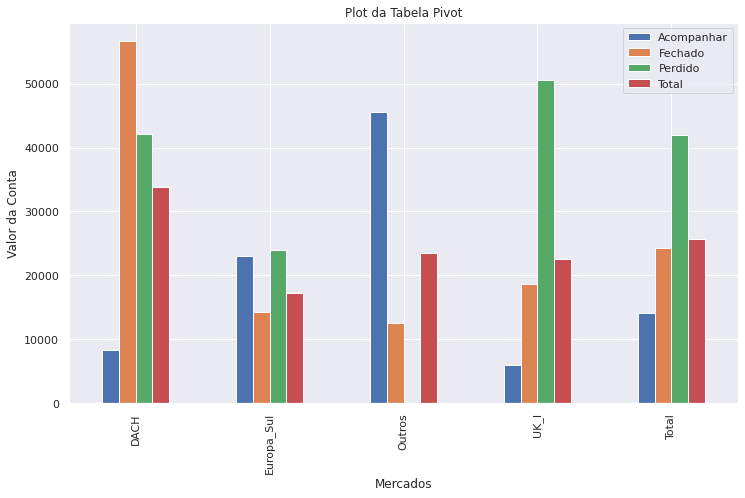

In [69]:
# Criando um gráfico utilizando o dataframe retornado pela tabela pivot
pivot['mean']['Valor_Conta'].plot(kind='bar'
                                , title="Plot da Tabela Pivot"
                                , figsize=(12,7))
plt.ylabel("Valor da Conta")
plt.legend(loc='upper right')